<a href="https://colab.research.google.com/github/malcolmbly/MachineLearningAZClass/blob/main/linear_regressions/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [23]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),-1)

In [24]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [25]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [26]:
#The course claimed scaling would be a necessary step for this project,
#but I was skeptical so i tried it with and without. It was important.

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)


sc_y = StandardScaler()
y = sc_y.fit_transform(y)

y = y.reshape(len(y))

In [27]:
print(y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


## Training the SVR model on the whole dataset

In [28]:
from sklearn.svm import SVR

reg = SVR(kernel='rbf').fit(X,y)

## Predicting a new result

In [29]:
#unscaled prediction, returns 130,001.83
reg.predict([[6.5]])

#scaled prediction
#both scaled returns 170,370.02

#only scaled X returns 130,001.83
scaled_in = sc_x.transform([[6.5]])
sc_y.inverse_transform(reg.predict(scaled_in))

array([170370.0204065])

## Visualising the SVR results

Text(0.5, 1.0, 'Salary vs Rank SVR')

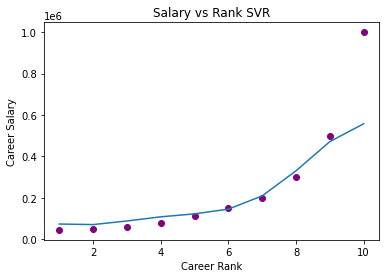

In [30]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color='purple')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(reg.predict(X)))
plt.xlabel('Career Rank') 
plt.ylabel('Career Salary') 
plt.title('Salary vs Rank SVR')   


## Visualising the SVR results (for higher resolution and smoother curve)

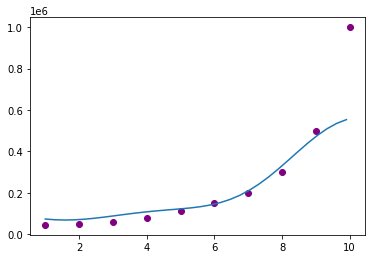

In [31]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color='purple')

X_smoothed=np.arange(min(X), max(X), 0.1).reshape(-1,1)

plt.plot(sc_x.inverse_transform(X_smoothed), sc_y.inverse_transform(reg.predict(X_smoothed)))

